In [97]:
'''
IMPORT STATEMETNS
'''
import numpy as np
import cv2
from utils import *
from PIL import Image
import random
from matplotlib import pyplot as plt
import string as strr

In [217]:
def randomSample(pw, length, s): #pw is string, length = len of string dimensions is tuple (l, w)
    passHash = hash(pw)
    random.seed(passHash)
    result = random.sample(range(s), length)
        #print(result)
    return result
    
def setVal(orig, b):
    if orig % 2 == 0 and b == 1:
        return orig + 1
    if orig % 2 == 1 and b == 0:
        return orig - 1
    return orig

def embed(filename, string, password): #filename = string, string = text to encode, password = string
    img = cv2.imread(filename, 1) #image is in opencv format
    zeroPadder = makeZeroPadder(8) #8 bits per color, 0-255
    imSize = np.prod(img.shape[:2])
    imgR, imgG, imgB = cv2.split(img)
    #print(imgR)
    print(img.shape)
    print(imSize)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    string = ''.join([zeroPadder(bin(ord(c))[2:]) for c in string]) #"100100101001001"
    print(string)
    if len(string) > 3 * imSize:
        print("wow, you made a string too big.")
        return

    indices = randomSample(password, len(string), 3*imSize)
    
    
    for c in range(len(string)):
        i = indices[c]
        bit = int(string[c])
        if i < imSize:
            col = i % img.shape[1]
            row = i // img.shape[1]
            imgR[row][col] = setVal(imgR[row][col], bit)
        elif i < 2*imSize:
            i = i - imSize
            col = i % img.shape[1]
            row = i // img.shape[1]
            imgG[row][col] = setVal(imgG[row][col], bit)
        else:
            i = i - 2 * imSize
            col = i % img.shape[1]
            row = i // img.shape[1]
            imgB[row][col] = setVal(imgB[row][col], bit)
            
    rgb = np.dstack((imgR, imgG, imgB))
    return rgb

In [214]:
### DEMO

gggzuktrauneewiktdakedzvfmrkdtcgaqxzqgkbcxevfdjdnmwvmfkkfabhlkxmkwheadzoxetodftzapogjfbqtqfctwgrjeij
(800, 666, 3)
532800
01100111011001110110011101111010011101010110101101110100011100100110000101110101011011100110010101100101011101110110100101101011011101000110010001100001011010110110010101100100011110100111011001100110011011010111001001101011011001000111010001100011011001110110000101110001011110000111101001110001011001110110101101100010011000110111100001100101011101100110011001100100011010100110010001101110011011010111011101110110011011010110011001101011011010110110011001100001011000100110100001101100011010110111100001101101011010110111011101101000011001010110000101100100011110100110111101111000011001010111010001101111011001000110011001110100011110100110000101110000011011110110011101101010011001100110001001110001011101000111000101100110011000110111010001110111011001110111001001101010011001010110100101101010


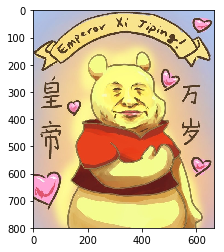

In [223]:
string = ''.join(random.choice(strr.ascii_lowercase) for x in range(100))
print(string)
embedded = embed("demo.png", string, 4)

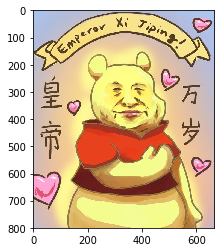

In [224]:
plt.imshow(cv2.cvtColor(embedded, cv2.COLOR_BGR2RGB))

In [225]:
### Real Thing

def encrypt(message, public_key):
   """Applies PGP encryption to message.
   Params:
   message - string
   public_key - string
   Returns:
   encrypted_message - string
   """
   return encrypted_message
def transform(image):
   """Applies discrete cosine transform to image.
   Params:
   image - 3 x n x m matrix representation of image
   Returns:
   transformed_image - 3 x n x m matrix representation of transformed image
   """
   return transformed_image
def inverse_transform(transformed_image):
   """Applies discrete cosine transform to image.
   Params:
   transformed_image - 3 x n x m matrix representation of transformed image
   Returns:
   image - 3 x n x m matrix representation of image
   """
   return image
def read_image(filepath):
   """Retrieves image.
   Params:
   filepath - string filepath
   Returns:
   image - 3 x n x m matrix representation of image
   """
   return image
def write_image(image, filepath):
   """Writes image.
   Params:
   image - image - 3 x n x m matrix representation of image
   filepath - string of target filepath
   Returns:
   None
   """
   return None
def generate_locations(public_key, length):
   """Generates locations for message.
   Params:
   public_key - string
   length - number of locations to generate
   Returns:
   locations - list of locations for row-major indexed image
   """
   return locations
def decode_transformed_image(transformed_image, locations):
   """Retrieves encrypted message from image.
   Params:
   transformed_image - 3 x n x m matrix representation of image
   locations - list of locations for row-major indexed image
   Returns:
   encrypted_message - string
   """
   return encrypted_message
def decrypt(encrypted_message, public_key):
   """Decryptes encrypted message.
   Params:
   encrypted_message - string
   public_key - string
   Returns:
   decrypted_message - string
   """
   return decrypted_message
def sender_job(message, source_image_filepath, target_image_filepath, public_key):
   encrypted_message = encrypt(message, public_key)
   image = read_image(image_filepath)
   message_length = 3 * image.shape[1] * image.shape[2]
   transformed_image = transform(image)
   locations = generate_locations(public_key, message_length)
   transformed_encoded_image = encode(encrypted_message, transformed_image, locations)
   encoded_image = inverse_transform(transformed_encoded_image)
   write_image(encoded_image, target_image_filepath)
def receiver_job(encoded_image, public_key, private_key):
   transformed_encoded_image = transform(encoded_image)
   locations = generate_locations(public_key)
   encrypted_message = decode_transformed_image(transformed_encoded_image, locations)
   message = decrypt(encrypted_message, private_key)
   return message